[//]: #![idaes_icon](idaes_icon.png)
<img src="idaes_icon.png" width="100">
<h1><center>Welcome to the IDAES Stakeholder Workshop</center></h1>

Welcome and thank you for taking the time to attend today's workshop. Today we will introduce you to the fundamentals of working with the IDAES process modeling toolset, and we will demonstrate how these tools can be applied for optimization applications.

Today's workshop will be conducted using Jupyter Notebooks which provide an online, interactive Python environment for you to use (without the need for installing anything).

Before we get started on some actual examples, let's make sure that everything is working correctly. The cell below contains a command to run a simple test script that will test that everything we will need for today is working properly.

You can execute a cell by pressing `Shift+Enter`.

In [1]:
run "notebook_test_script.py"

Pyomo Import Checks:        Passed
IDAES Import Checks:        Passed
Solver Availability Check:  Passed
Simple Model Check:         Passed

All Good!


If everything worked properly, you should see a message saying `All good!` and a summary of all the checks that were run. If you don't see this, please contact someone for assistance.

## Outline of Workshop

Today's workshop is divided into four modules which will take you through the steps of setting up a flowsheet within the IDAES framework.

Welcome Module (this one):

* Introduction to Jupyter notebooks and Python
* Introduction to Pyomo

Module 1 will cover:

* how to import models from the core IDAES model library,
* how to create a model for a single unit operation,
* how to define feed and operating conditions,
* how to initialize and a single unit model,
* some ways we can manipulate the model and examine the results.

Module 2 will demonstrate:

* how to combine unit models together to form flowsheets,
* tools to initialize and solve flowsheets with recycle loops,
* how to optimize process operating conditions to meet product specifications.

Module 3 will demonstrate:

* how to build new unit models using the IDAES tools,
* how to include new unit models into flowsheets.


## Introduction to Jupyter Notebooks and Python

In this short notebook, we will briefly describe the uses of Jupyter notebooks like this one, and provide you with the necessary background in Python for this workshop. We will cover `if` statements, looping, array-like containers called lists and dictionaries, as well as the use of some external packages for working with data. 

There are many additional tutorials online to learn more about the Python syntax.

In Python, variables do not need to be declared before they are used. You can simply define a new variable using `x = 5`.

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
In the cell below, assign a value of 5 to the variable x. Don't forget to type Shift+Enter to execute the line.</div>

In [2]:
x = 5

You can easily see the value of a variable using the built-in `print` function. For example, to print the value of `x` use `print(x)`.

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Write the code to print the value of x. Don't forget to hit Shift+Enter to execute the cell.
</div>

In [3]:
print(x)

5


<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Now change the value of the x variable to 8 and execute the cell.
</div>

In [4]:
x = 8

### Jupyter notebooks and execution order

<div class="alert alert-block alert-warning">
<b>Note:</b>
When using Jupyter notebooks, it is very important to know that the cells can be executed out of order (intentionally or not). The state of the environment (e.g., values of variables, imports, etc.) is defined by the execution order.
</div>

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
To see this concept, select the cell above that contained the print statement and execute the cell again using Shift+Enter.
</div>

You should see that the value `8` is now printed. This may seem problematic if you are used to programming in environments where the state is linked to the order of the commands as *written*, not as *executed*.

**Again, notice that the state of the environment is determined by the execution order.**

Note also that the square brackets to the left of the cell show the order that cells were executed. If you scroll to the top, you should see that the code cells show an execution order of `[1]`, `[2]`, `[5]`, and `[4]`, indicating the actual execution order.

There are some useful menu commands at the top of the Jupyter notebook to help with these problems and make sure you retain the execution order as expected.

Some important commands to remember:
* You can clear the current state with the menu item `Kernel | Restart & Clear Output`
* It is often useful to clear the state using the menu command just described, and then execute all the lines **above the currently selected cell** using `Cell | Run All Above`.
* You can clear all the state and re-run the entire notebook using `Kernel | Restart & Run All`.

To show the use of these commands, complete the following.
<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
<ul>
<li>Clear the current state (using Kernel | Restart & Clear Output). You should notice that the square brackets that listed the execution order are all now empty.</li>
<li>Select the cell immediately below this text
<li>Re-run all the code up to this point (Cell | Run All Above). You should now see that the square brackets indicate the expected execution order.</li>
<li>Print the value of x again using the print function. You should see the value 8 printed, while the earlier cell printing x shows the value of 5 as expected.</li>
</ul>
</div>


In [5]:
print(x)

8


### Python `if` statements

In the code below, we show an example of an `if` statement in Python.

```python
temp = 325
# some other code
if temp > 320:
    print('temperature is too high')
elif x < 290:
    print('temperature is too low')
else:
    print('temperature is just right')
```

<div class="alert alert-block alert-warning">
<b>Note:</b>
You will notice that there are no braces to separate blocks in the if-else tree. In Python, indentation is used to delineate blocks of code throughout Python (e.g., if statements, for loops, functions, etc.). The indentation in the above example is not only to improve legibility of the code. It is necessary for the code to run correctly. As well, the number of spaces required to define the indentation is arbitrary, but it must be consistent throughout the code. For example, we could use 3 spaces (instead of the 4 used in the example above, but we could not use 3 for one of the blocks and 4 for another).
</div>

Using the syntax above for the `if` statement, write the following code.
<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
<ul>
    <li>set the value of the variable T_degC to 20</li>
    <li>convert this from degrees Celsius to degrees Fahrenheit (use variable name T_degF)</li>
    <li>write an `if` statement that prints a  message if the degrees Fahrenheit are below 70</li>
</ul>
</div>

In [6]:
T_degC = 20
# some other code
T_degF = (T_degC * 9.0/5.0) + 32.0

# Todo: put the if statement here
if T_degF < 70:
    print('The room is too cold.')

The room is too cold.


### Python list containers

Now we will illustrate the use of lists in Python. Lists are similar to vectors or arrays in other languages. A list in Python is indexed by integers from 0 up to the length of the array minus 1. The list can contain standard types (int, float, string), or other objects.

In the next inline exercise, we will create a list that contains the values from 0 to 50 by steps of 5 using a for loop. Note that the python function `range(n)` can be used to iterate from 0 to (n-1) in a for loop. Also note that lists have an `append` method which adds an entry to the end of the list (e.g., if the list `l` currently has 5 elements, then `l.append('temp')` will add the string "temp" as the sixth element). Print the new list after the for loop. If this is done correctly, you should see:
`[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]` printed after the cell.

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Complete the code block below to create the desired list and print the result.
</div>

In [7]:
# Create a list with the values 0 to 50 with steps of 5.
xlist = list()
for i in range(11):
    # Todo: use the append method of list to append the correct value
    xlist.append(i*5)

print(xlist) # Todo: print the value of xlist to verify the results

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


Python provides a short-hand notation for building lists called *list comprehensions*. An example of a list comprehension that creates all even numbers from 0 to 40 is:

```python
values = [q*2 for q in range(21)]
```

Note also that list comprehensions can include if clauses. For example, we could also implement the above example with the following code:

```python
values = [q for q in range(41) if q % 2 == 0]
```

Note that `%` is the modulus operator (it returns the remainder of the division). Therefore, in the above code, `q % 2` returns 0 if the value in `q` is exactly divisible by 2 (i.e., an even number).

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
In the cell below, create the same xlist that we created previously, but use the list comprehension notation. Verify that this result is correct by printing it.
</div>


In [8]:
# Todo: define the list comprehension
xlist = [i*5 for i in range(11)] 
print(xlist)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


You can easily check the length of a list using the python `len(l)` function.
<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Print the length of `xlist`. It should be 11.
</div>

In [9]:
print(len(xlist)) # Todo: print the len of the list

11


If you have a list of values or objects, it is easy to iterate through that list in a for loop. In the next inline exercise, we will create another list, `ylist` where each of the values is equal to the corresponding value in `xlist` squared. That is, $y_i = x_i^2$.

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Modify the code below to create ylist as described above. Print the values in ylist to check the result.
</div>

In [10]:
ylist = list()

# Todo: define the for loop to add elements to ylist using the values in xlist
for x in xlist:
    ylist.append(x**2)

print(ylist)

[0, 25, 100, 225, 400, 625, 900, 1225, 1600, 2025, 2500]


This same task could have been done with a list comprehension (using much less code).

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Write the list comprehension to compute the values of ylist. Print the values in ylist to check the result.
</div>

In [11]:
# Todo: create ylist using a list comprehension and print the result
ylist = [x**2 for x in xlist]
print(ylist)

[0, 25, 100, 225, 400, 625, 900, 1225, 1600, 2025, 2500]


### Python dictionary containers

Another valuable data structure in Python are *dictionaries*. Dictionaries are an associative array; that is, a map from keys to values or objects. The keys can be *almost* anything, including floats, integers, and strings. The code below shows an example of creating a dictionary (here, to store the areas of some of the states).
<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Execute the lines below to see the areas dictionary.
</div>

In [12]:
areas = dict()
areas['South Dakota'] = 199742               
areas['Oklahoma'] = 181035
print(areas)

{'South Dakota': 199742, 'Oklahoma': 181035}


Dictionaries can contain mixed types (i.e., it is valid to add `areas['Texas'] = 'Really big!'`) but this may lead to unpredictable behavior if the different types are unexpected in other parts of the code.

You can loop through dictionaries in different ways. For example,
```python
d = {'A': 2, 'B': 4, 'D': 16}
for k in d.keys():
    # loop through the keys in the dictionary
    # access the value with d[k]
    print('key=', k, 'value=', d[k])
    
for v in d.values():
    # loop through the values in the dictionary, ignoring the keys
    print('value=', v)
    
for k,v in d.items():
    # loop through the entries in the dictionary, retrieving both
    # the key and the value
    print('key=', k, 'value=', v)
```

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
The areas listed above for the two states are in square kilometers. Modify the loop below to create a new dictionary that contains the areas in square miles. Print the new dictionary to verify the correct behavior. Note that 1 kilometer is equal to 0.62137 miles.
</div>

In [13]:
areas_mi = dict()
for state_name, area in areas.items():
    # Todo: convert the area to sq. mi and assign to the areas_mi dict.
    areas_mi[state_name] = area*(0.62137**2)
print(areas_mi)

{'South Dakota': 77120.5214053598, 'Oklahoma': 69897.7360425915}


Python also supports dictionary comprehensions much like list comprehensions. For example:
```python
d = {'A': 2, 'B': 4, 'D': 16}
d2 = {k:v**2 for k,v in d.items()}
```

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Redo the conversion from square kilometers to square miles using a dictionary comprehension.
</div>

In [14]:
# Todo: define areas_mi using a dictionary comprehension and print the result
areas_mi = {k:v*(0.62137**2) for k,v in areas.items()}
print(areas_mi)

{'South Dakota': 77120.5214053598, 'Oklahoma': 69897.7360425915}


### Matplotlib for generating figures

We will now briefly explore the use of the `matplotlib` package to generate figures. Before we do this, we will introduce some other helpful tools.

Another effective way to create a list of evenly spaced numbers (e.g., for plotting or other computation) is to use the `linspace` function from the `numpy` package. Let's import the `numpy` package and use linspace function to create a list of 15 evenly spaced intervals (that is, 16 points) from 0 to 50 and store this in `xlist`. We will also create the `ylist` that corresponds to the square of the values in `xlist`. Note, we must first import the `numpy` package.
<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Execute the next two cells to see the output.
</div>

In [15]:
import numpy as np

In [16]:
xlist = list(np.linspace(0,50,16))
ylist = [x**2 for x in xlist]
print(xlist)
print(ylist)

[0.0, 3.3333333333333335, 6.666666666666667, 10.0, 13.333333333333334, 16.666666666666668, 20.0, 23.333333333333336, 26.666666666666668, 30.0, 33.333333333333336, 36.66666666666667, 40.0, 43.333333333333336, 46.66666666666667, 50.0]
[0.0, 11.111111111111112, 44.44444444444445, 100.0, 177.7777777777778, 277.7777777777778, 400.0, 544.4444444444446, 711.1111111111112, 900.0, 1111.1111111111113, 1344.4444444444448, 1600.0, 1877.777777777778, 2177.7777777777783, 2500.0]


This printed output is not a very effective way to communicate these results. Let's use matplotlib to create a figure of x versus y. A full treatment of the `matplotlib` package is beyond the scope of this tutorial. For now, we will import the plotting capability and show how to generate a straightforward figure. You can consult the documentation for matplotlib for further details.

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Execute the next two cells to see the output.
</div>

In [17]:
import matplotlib.pyplot as plt

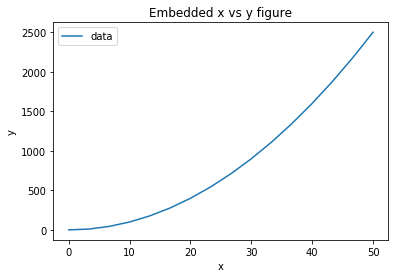

In [18]:
plt.plot(xlist, ylist)
plt.title('Embedded x vs y figure')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data'])
plt.show()

Next, we will use what you have learned so far to create a plot of `sin(x)` for `x` from 0 to $2 \pi$ with 100 points. Note, you can get the `sin` function and the value for $\pi$ from the `math` package.
<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Execute the import statement in the next cell, and then complete the missing code in the following cell to create the figure discussed above.
</div>

In [19]:
import math

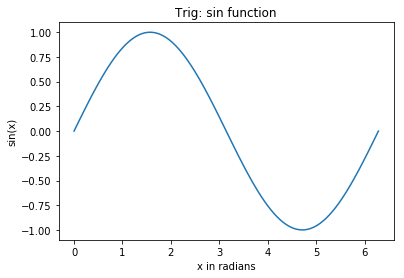

In [20]:
x = list(np.linspace(0,2*math.pi, 100))

# Todo: create the list for y
y = [math.sin(xv) for xv in x] 

# Todo: Generate the figure
plt.plot(x, y)
plt.title('Trig: sin function')
plt.xlabel('x in radians')
plt.ylabel('sin(x)')
plt.show()

### Importing and exporting data using Pandas

Often, it is useful to output the data in a general format so it can be imported into other tools or presented in a familiar application. Python makes this easy with many great packages already available. The next code shows how to use the `pandas` package to create a dataframe and export the data to a csv file that we can import to excel. You could also consult pandas documentation to see how to export the data directly to excel.
<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Execute the code below that shows how to import some data into a DataFrame from the Pandas package and then export this data to a csv file.
</div>

In [21]:
import pandas as pd
df_sin = pd.DataFrame({'x': x, 'sin(x) (radians)': y})
print(df_sin)
df_sin.to_csv('sin_data.csv')

           x  sin(x) (radians)
0   0.000000      0.000000e+00
1   0.063467      6.342392e-02
2   0.126933      1.265925e-01
3   0.190400      1.892512e-01
4   0.253866      2.511480e-01
5   0.317333      3.120334e-01
6   0.380799      3.716625e-01
7   0.444266      4.297949e-01
8   0.507732      4.861967e-01
9   0.571199      5.406408e-01
10  0.634665      5.929079e-01
11  0.698132      6.427876e-01
12  0.761598      6.900790e-01
13  0.825065      7.345917e-01
14  0.888531      7.761465e-01
15  0.951998      8.145760e-01
16  1.015464      8.497254e-01
17  1.078931      8.814534e-01
18  1.142397      9.096320e-01
19  1.205864      9.341479e-01
20  1.269330      9.549022e-01
21  1.332797      9.718116e-01
22  1.396263      9.848078e-01
23  1.459730      9.938385e-01
24  1.523196      9.988673e-01
25  1.586663      9.998741e-01
26  1.650129      9.968548e-01
27  1.713596      9.898214e-01
28  1.777063      9.788024e-01
29  1.840529      9.638422e-01
..       ...               ...
70  4.44

If you go back to the browser tab that showed all the Jupyter notebook files and refresh, you will now see that there is a csv file with the x and y data. You can consult the Pandas documentation do learn about the many data analysis and statistical features of the `pandas` package.

## Introduction to Pyomo

Pyomo is an object-oriented, python-based package for equation-oriented (or *algebraic*) modeling and optimization. The IDAES framework is built upon the Pyomo package. IDAES extends the Pyomo package and defines a class heirarchy for flowsheet based modeling, including definition of property packages, unit models, and flowsheets.

The use of IDAES does not require extensive knowledge about Pyomo, however, it can be beneficial to have some familiarity with the Pyomo package for certain tasks:
* IDAES models are open, and you can interrogating the underlying Pyomo model to view the variables, constraints, and objective functions defined in the model.
* You can use Pyomo components to define your objective function or to create additional constraints.
* Since IDAES models **are** Pyomo models, any advanced meta-algorithms or analysis tools that can be developed and/or used on a Pyomo model can also be used on an IDAES model.

A full tutorial on Pyomo is beyond the scope of this workshop, however, in this section, we will briefly cover the commands required to specify an objective function or add a constraint to an existing model.

In the next cell, we will create a Pyomo model, and add a couple of variables to that model. When using IDAES, you will define a flowsheet and the addition of variables and model equations will be handled by the IDAES framework.

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Execute the following cell to create a Pyomo model with some variables that will be used later.
</div>

In [22]:
from pyomo.environ import ConcreteModel, Var
model = ConcreteModel()
model.x = Var()
model.y = Var()

The Pyomo syntax to define a scalar objective function is shown below. This defines the objective function as $x^2$. By default Pyomo models (and IDAES models) seek to *minimize* the objective function.
```python
model.obj = Objective(expr=model.x**2)
```
To maximize a quantity, include the keyword argument `sense=maximize` as in the following:
```python
model.obj = Objective(expr=model.y, sense=maximize)
```
Note that `Objective` and `maximize` would need to be imported from `pyomo.environ`.

The Pyomo syntax to define a scalar constraint is shown below. This code defines the equality constraint $x^2 + y^2 = 1$.
```python
model.on_unit_circle_con = Constraint(expr=model.x**2 + model.y**2 == 1)
```
Pyomo also supports inequalities. For example, the code for the inequality constraint $x^2 + y^2 \le 1$ is given as the following.
```python
model.inside_unit_circle_con = Constraint(expr=model.x**2 + model.y**2 <= 1)
```
Note that, as before, we would need to include the appropriate imports. In this case `Constraint` would need to be imported from `pyomo.environ`.

Using the syntax shown above, we will now add the objective function: $\min x^2 + y^2$ and the constraint $x + y = 1$.

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Complete the missing code in the cell below. If this is done correctly, after executing the cell, you should see the log output from the solver and the printed solution should show that x, y, and the objective value are all equal to 0.5.
</div>


In [23]:
from pyomo.environ import Objective, Constraint, value

# Todo: add the objective function here
model.obj = Objective(expr=model.x**2 + model.y**2)

# Todo: add the constraint here
model.con = Constraint(expr=model.x + model.y == 1)

# now solve the problem
status = SolverFactory('ipopt').solve(model, tee=True) # tee=True shows the solver log

# print the values of x, y, and the objective function at the solution
# Note that the results are automatically stored in the model variables
print('x =', value(model.x))
print('y =', value(model.y))
print('obj =', value(model.obj))

Ipopt 3.12.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Tot

Notice that the code above also imported the `value` function. This is a Pyomo function that should be used to retrieve the value of variables in Pyomo (or IDAES) models. Note that you can display the complete list of all variables, objectives, and constraints (with their expressions) using `model.pprint()`. The `display` method is similar to the `pprint` method except that is shows the *values* of the constraints and objectives instead of the underlying expressions. The `pprint` and `display` methods can also be used on individual components.

<div class="alert alert-block alert-info">
<b>Inline Exercise:</b>
Execute the lines of code below to see the output from pprint and display for a Pyomo model.
</div>

In [24]:
print('*** Output from model.pprint():')
model.pprint()

print()
print('*** Output from model.display():')
model.display()

*** Output from model.pprint():
2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.5 :  None : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.5 :  None : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x**2 + y**2

1 Constraint Declarations
    con : Size=1, Index=None, Active=True
        Key  : Lower : Body  : Upper : Active
        None :   1.0 : x + y :   1.0 :   True

4 Declarations: x y obj con

*** Output from model.display():
Model unknown

  Variables:
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.5 :  None : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : D